In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Utilitis_HybridCode as utils

# $10^5$ particles

# 1. Standard

In [2]:
data1 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/06_Github/mhd/02_HybridModelling/Results/01_NoDipoleField/03_ParticleScan/data_T=200_N=32_dt=0.0125_p=1_Np=1e5_amp=1e-4_NoCV.txt')

en_E1  = data1[1:, -5]
en_B1  = data1[1:, -4]
en_C1  = data1[1:, -3]
en_H1  = data1[1:, -2]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

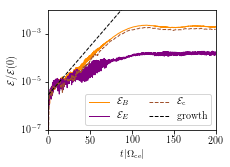

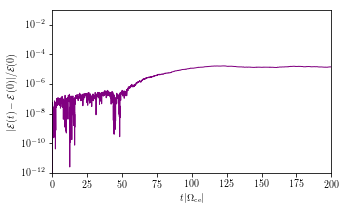

In [3]:
f1 = plt.figure()
f1.set_figheight(2.2)
f1.set_figwidth(3.0)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot1 = en_B1 + en_E1 + en_C1 + en_H1

Nt = len(en_B1) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B1/en_tot1[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
plt.semilogy(tn, en_E1/en_tot1[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
plt.semilogy(tn, en_C1/en_tot1[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#plt.semilogy(tn, en_H1/en_tot1[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 3e-6*np.exp(tg*gamma*2), 'k--', linewidth = 1, label = 'growth')

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-7, 1e-2))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
plt.savefig('/home/florian/Schreibtisch/Masterarbeit/08_Paper/01_Figures/energies_standard_10e5.pgf', bbox_inches = 'tight')





f2 = plt.figure()
f2.set_figheight(3)
f2.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot1 - en_tot1[0])/en_tot1[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-1))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Conservation_GEMPIC_Strang_p=1_NoCV.pdf', bbox_inches = 'tight')

# 2. GEMPIC: Lie-Trotter

In [4]:
data2 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/06_Github/learning-python/data_Nel=32_dt=0.0125_Np=1e5_T=200_amp=1e-4_p=1_FirstLie_NoCV')

en_B2  = data2[:, 0]
en_E2  = data2[:, 1]
en_C2  = data2[:, 2]
en_H2  = data2[:, 3]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

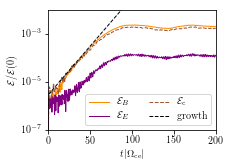

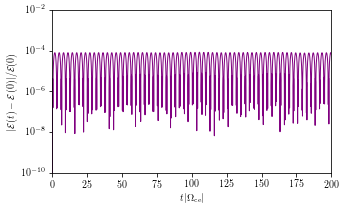

In [5]:
f3 = plt.figure()
f3.set_figheight(2.2)
f3.set_figwidth(3.0)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot2 = en_B2 + en_E2 + en_C2 + en_H2

Nt = len(en_B2) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B2/en_tot2[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
plt.semilogy(tn, en_E2/en_tot2[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
plt.semilogy(tn, en_C2/en_tot2[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#plt.semilogy(tn, en_H2/en_tot2[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 3e-6*np.exp(tg*gamma*2), 'k--', linewidth = 1, label = 'growth')

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-7, 1e-2))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
plt.savefig('/home/florian/Schreibtisch/Masterarbeit/08_Paper/01_Figures/energies_LieTrotter_10e5.pgf', bbox_inches = 'tight')






f4 = plt.figure()
f4.set_figheight(3)
f4.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot2 - en_tot2[0])/en_tot2[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-10, 1e-2))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Conservation_GEMPIC_Strang_p=1_NoCV.pdf', bbox_inches = 'tight')

# 3. GEMPIC: Strang

In [6]:
data3 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/06_Github/learning-python/data_Nel=32_dt=0.0125_Np=1e5_T=200_amp=1e-4_p=1_SecondStrang_NoCV')

en_B3  = data3[:, 0]
en_E3  = data3[:, 1]
en_C3  = data3[:, 2]
en_H3  = data3[:, 3]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

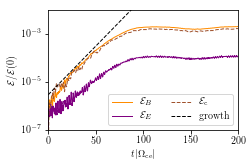

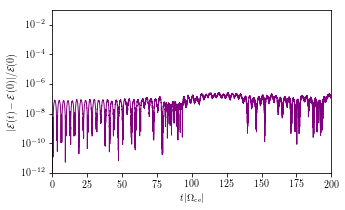

In [8]:
f5 = plt.figure()
f5.set_figheight(2.2)
f5.set_figwidth(3.4)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot3 = en_B3 + en_E3 + en_C3 + en_H3

Nt = len(en_B3) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B3/en_tot3[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
plt.semilogy(tn, en_E3/en_tot2[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
plt.semilogy(tn, en_C3/en_tot3[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#plt.semilogy(tn, en_H3/en_tot3[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 3e-6*np.exp(tg*gamma*2), 'k--', linewidth = 1,label = 'growth')

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-7, 1e-2))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Energies_GEMPIC_Strang_p=2_NoCV.pdf', bbox_inches = 'tight')





f6 = plt.figure()
f6.set_figheight(3)
f6.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot3 - en_tot3[0])/en_tot3[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-1))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Conservation_GEMPIC_Strang_p=1_NoCV.pdf', bbox_inches = 'tight')

# 4. Comparison

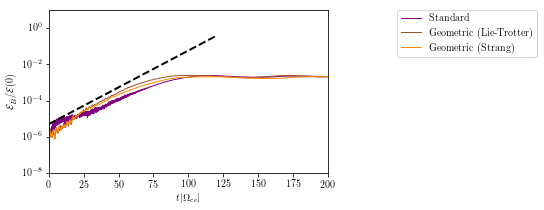

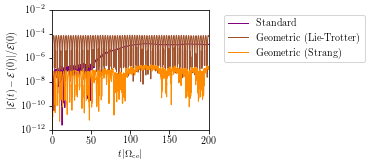

In [14]:
f7 = plt.figure()
f7.set_figheight(3)
f7.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')


colors = ['purple', 'sienna', 'darkorange', 'royalblue', 'red']
labels = ['Standard', 'Geometric (Lie-Trotter)', 'Geometric (Strang)']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]

omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B1/en_tot1[0], linewidth = 1, label = labels[0], color = colors[0])
plt.semilogy(tn, en_B2/en_tot2[0], linewidth = 1, label = labels[1], color = colors[1])
plt.semilogy(tn, en_B3/en_tot3[0], linewidth = 1, label = labels[2], color = colors[2])

plt.semilogy(tg, 5e-6*np.exp(tg*gamma*2), 'k--', linewidth = 2)

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E}_{\tilde{B}} / \mathcal{E}(0)$')
plt.ylim((1e-8, 1e1))
plt.xlim((0, 200))
plt.legend(loc = 'upper center', ncol = 1, bbox_to_anchor = (1.5, 1.03))
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/05_Results/Comparison_GEM_Standard_1.pdf', bbox_inches = 'tight')





f8 = plt.figure()
f8.set_figheight(2.2)
f8.set_figwidth(2.8)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')


plt.semilogy(tn, np.abs(en_tot1 - en_tot1[0])/en_tot1[0], linewidth = 1, color = 'purple', label = 'Standard')
plt.semilogy(tn, np.abs(en_tot2 - en_tot2[0])/en_tot2[0], linewidth = 1, color = 'sienna', label = 'Geometric (Lie-Trotter)')
plt.semilogy(tn, np.abs(en_tot3 - en_tot3[0])/en_tot3[0], linewidth = 1, color = 'darkorange', label = 'Geometric (Strang)')

plt.xlim((0, 200))
plt.ylim((1e-12, 1e-2))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
plt.legend(loc = 'upper center', ncol = 1, bbox_to_anchor = (1.55, 1.0))
plt.savefig('/home/florian/Schreibtisch/Masterarbeit/08_Paper/01_Figures/comparison_energies_10e5.pgf', bbox_inches = 'tight')

# $10^6$ particles

# 1. Standard

In [19]:
data4 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/06_Github/mhd/02_HybridModelling/Results/01_NoDipoleField/data_T=200_N=32_dt=0.0125_p=1_Np=1e6_amp=1e-4_NoCV.txt')

en_E4  = data4[1:, -5]
en_B4  = data4[1:, -4]
en_C4  = data4[1:, -3]
en_H4  = data4[1:, -2]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

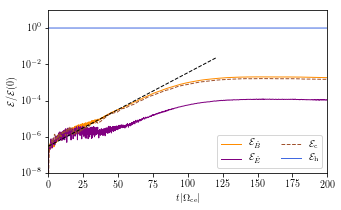

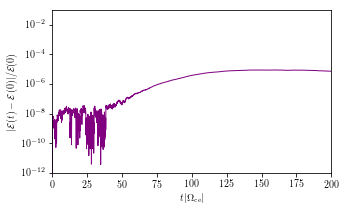

In [26]:
f9 = plt.figure()
f9.set_figheight(3)
f9.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot4 = en_B4 + en_E4 + en_C4 + en_H4

Nt = len(en_B4) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B4/en_tot4[0], linewidth = 1, label = r'$\mathcal{E}_{\tilde{B}}$', color = colors[0])
plt.semilogy(tn, en_E4/en_tot4[0], linewidth = 1, label = r'$\mathcal{E}_{\tilde{E}}$', color = colors[1])
plt.semilogy(tn, en_C4/en_tot4[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
plt.semilogy(tn, en_H4/en_tot4[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 3e-7*np.exp(tg*gamma*2), 'k--', linewidth = 1)

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-8, 1e1))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Energies_GEMPIC_Strang_p=2_NoCV.pdf', bbox_inches = 'tight')





f10 = plt.figure()
f10.set_figheight(3)
f10.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot4 - en_tot4[0])/en_tot4[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-1))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Conservation_GEMPIC_Strang_p=1_NoCV.pdf', bbox_inches = 'tight')

# 2. GEMPIC: Lie-Trotter

In [21]:
data5 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/06_Github/learning-python/data_Nel=32_dt=0.0125_Np=1e6_T=200_amp=1e-4_p=1_FirstLie_NoCV')

en_B5  = data5[:, 0]
en_E5  = data5[:, 1]
en_C5  = data5[:, 2]
en_H5  = data5[:, 3]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

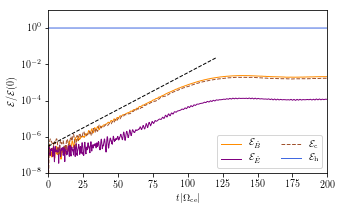

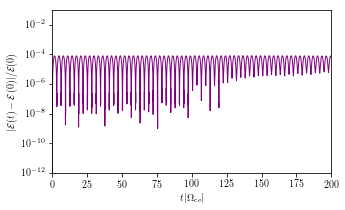

In [25]:
f11 = plt.figure()
f11.set_figheight(3)
f11.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot5 = en_B5 + en_E5 + en_C5 + en_H5

Nt = len(en_B5) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B5/en_tot5[0], linewidth = 1, label = r'$\mathcal{E}_{\tilde{B}}$', color = colors[0])
plt.semilogy(tn, en_E5/en_tot5[0], linewidth = 1, label = r'$\mathcal{E}_{\tilde{E}}$', color = colors[1])
plt.semilogy(tn, en_C5/en_tot5[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
plt.semilogy(tn, en_H5/en_tot5[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 3e-7*np.exp(tg*gamma*2), 'k--', linewidth = 1)

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-8, 1e1))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Energies_GEMPIC_Strang_p=2_NoCV.pdf', bbox_inches = 'tight')





f4 = plt.figure()
f4.set_figheight(3)
f4.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot5 - en_tot5[0])/en_tot5[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-1))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Conservation_GEMPIC_Strang_p=1_NoCV.pdf', bbox_inches = 'tight')

# 3. GEMPIC: Strang

# 4. Comparison